# Data Cleaning:

**Reading the file:**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dating_data = pd.read_csv("Speed_Dating_Data.csv", encoding = "ISO-8859-1")
dating_data.head()


iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
0    1  1.0       0    1       1     1     10         7       NaN      4   
1    1  1.0       0    1       1     1     10         7       NaN      3   
2    1  1.0       0    1       1     1     10         7       NaN     10   
3    1  1.0       0    1       1     1     10         7       NaN      5   
4    1  1.0       0    1       1     1     10         7       NaN      7   

    ...    attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
1   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
2   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
3   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
4   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   

   intel5_3  fun5_3  amb5_3  
0       NaN     NaN     NaN  
1       NaN     NaN     NaN  
2       NaN     NaN     NaN  
3       NaN     NaN     NaN  
4       NaN     NaN     NaN  

[5 rows x 195 columns]

**Basic information about the file**

In [3]:
dating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


**Visualizing all columns**

In [4]:
dating_data.columns[:100]

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace',
       'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun',
       'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o',
       'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field',
       'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace',
       'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out',
       'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1',
       'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
       'amb2_1', 'shar2_1', 'attr3_1', 'si

In [5]:
dating_data.columns[100:195]

Index(['intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es',
       'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s',
       'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s', 'satis_2',
       'length', 'numdat_2', 'attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2',
       'amb7_2', 'shar7_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2',
       'amb1_2', 'shar1_2', 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2',
       'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2',
       'amb2_2', 'shar2_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2',
       'amb3_2', 'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2',
       'you_call', 'them_cal', 'date_3', 'numdat_3', 'num_in_3', 'attr1_3',
       'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr7_3',
       'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3', 'attr4_3',
       'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3', 'attr2_3',
       'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3'

**Identifying columns that are type object**

In [6]:
for column in dating_data.columns:
    if dating_data[column].dtype == 'object':
        print(column)

field
undergra
mn_sat
tuition
from
zipcode
income
career


In [7]:
dating_data['career'].values

array(['lawyer', 'lawyer', 'lawyer', ...,
       "assistant master of the universe (otherwise it's too much work)",
       "assistant master of the universe (otherwise it's too much work)",
       "assistant master of the universe (otherwise it's too much work)"], dtype=object)

**Identifying and dropping unnecessary columns**

In [8]:
data_columns = pd.read_csv("data_columns.csv")
data_columns.head()

Column                             Description Drop_column Variable_type
0     iid  Unique subject number across all waves         NaN   Categorical
1      id              Subject number within wave         NaN   Categorical
2  gender                                  Gender         NaN   Categorical
3     idg            Subject number within gender         NaN   Categorical
4  condtn                               Condition           x   Categorical

In [9]:
drop_col = data_columns.loc[data_columns['Drop_column'] == 'x', 'Column']

In [10]:
dating_data_clean = dating_data.drop(list(drop_col), axis='columns')
dating_data_clean.shape

(8378, 88)

In [11]:
dating_data_clean.head()

iid   id  gender  idg  wave  round  partner   pid  match  int_corr  \
0    1  1.0       0    1     1     10        1  11.0      0      0.14   
1    1  1.0       0    1     1     10        2  12.0      0      0.54   
2    1  1.0       0    1     1     10        3  13.0      1      0.16   
3    1  1.0       0    1     1     10        4  14.0      1      0.61   
4    1  1.0       0    1     1     10        5  15.0      1      0.21   

     ...     amb1_s  shar1_s  attr3_s  sinc3_s  intel3_s  fun3_s  amb3_s  \
0    ...        NaN      NaN      NaN      NaN       NaN     NaN     NaN   
1    ...        NaN      NaN      NaN      NaN       NaN     NaN     NaN   
2    ...        NaN      NaN      NaN      NaN       NaN     NaN     NaN   
3    ...        NaN      NaN      NaN      NaN       NaN     NaN     NaN   
4    ...        NaN      NaN      NaN      NaN       NaN     NaN     NaN   

   date_3  numdat_3  num_in_3  
0     0.0       NaN       NaN  
1     0.0       NaN       NaN  
2     0.0       NaN       NaN  
3     0.0       NaN       NaN  
4     0.0       NaN       NaN  

[5 rows x 88 columns]

**Changing to categorical type**

In [96]:
cat_col = list(data_columns[(data_columns['Variable_type'] == 'Categorical')  & (data_columns['Drop_column'] != 'x')]['Column'])
cat_col

['iid',
 'id',
 'gender',
 'idg',
 'wave',
 'partner',
 'pid',
 'match',
 'dec_o',
 'field_cd',
 'goal',
 'date',
 'go_out',
 'career_c',
 'dec',
 'met',
 'date_3']

In [13]:
dating_data_clean.columns

Index(['iid', 'id', 'gender', 'idg', 'wave', 'round', 'partner', 'pid',
       'match', 'int_corr', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int',
       'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o',
       'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o',
       'age', 'field_cd', 'goal', 'date', 'go_out', 'career_c', 'sports',
       'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
       'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
       'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1',
       'fun3_1', 'intel3_1', 'amb3_1', 'dec', 'attr', 'sinc', 'intel', 'fun',
       'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sinc1_s',
       'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s',
       'intel3_s', 'fun3_s', 'amb3_s', 'date_3', 'numdat_3', 'num_in_3'],
      dtype='object')

In [14]:
for column in cat_col:
    dating_data_clean[column] = dating_data_clean[column].astype('category')

dating_data_clean[cat_col].describe()


iid      id  gender   idg  wave  partner     pid  match  dec_o  \
count   8378  8377.0    8378  8378  8378     8378  8368.0   8378   8378   
unique   551    22.0       2    44    21       22   551.0      2      2   
top      552     1.0       1     1    21        1   552.0      0      0   
freq      22   552.0    4194   277   968      551    22.0   6998   4863   

        field_cd    goal    date  go_out  career_c   dec     met  date_3  
count     8296.0  8299.0  8281.0  8299.0    8240.0  8378  8003.0  3974.0  
unique      18.0     6.0     7.0     7.0      17.0     2     8.0     2.0  
top          8.0     1.0     6.0     2.0       2.0     0     0.0     0.0  
freq      1925.0  3426.0  2094.0  2990.0    2320.0  4860  4047.0  2476.0

**Missing values**

In [15]:
# check how many columns have null values:

col_nul_check = pd.isnull(dating_data_clean).any(axis='index')

col_null_count = col_nul_check.groupby(col_nul_check.values).count()
col_null_count

False     9
True     79
dtype: int64

In [16]:
# find column names with null values:
col_null = col_nul_check[col_nul_check == True]
col_null.index

Index(['id', 'pid', 'int_corr', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int',
       'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o',
       'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age',
       'field_cd', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports',
       'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping',
       'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1',
       'fun1_1', 'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'fun3_1',
       'intel3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar',
       'like', 'prob', 'met', 'match_es', 'attr1_s', 'sinc1_s', 'intel1_s',
       'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s',
       'fun3_s', 'amb3_s', 'date_3', 'numdat_3', 'num_in_3'],
      dtype='object')

In [17]:
id_null_check = dating_data_clean['id'].isnull() == True
id_null = dating_data_clean['id'][id_null_check]
id_null
# >> added to list of columns to be dropped

8377   NaN
Name: id, dtype: category
Categories (22, float64): [1.0, 2.0, 3.0, 4.0, ..., 19.0, 20.0, 21.0, 22.0]

In [18]:
# missing pid values:
pid_null_check = dating_data_clean['pid'].isnull() == True
pid_null = dating_data_clean['pid'][pid_null_check]
dating_data_clean.loc[pid_null.index, ('wave','partner')]

# Can it be derived from "partner" and "wave"? Several important columns are NaN as well
# No one has a match
# Ignore these rows - rating of partner the night of even are all NaN. Ratings about partner exists

wave partner
1755    5       7
1765    5       7
1775    5       7
1785    5       7
1795    5       7
1805    5       7
1815    5       7
1825    5       7
1835    5       7
1845    5       7

In [21]:
# find pid for records above:

filter_pid = (dating_data_clean['wave'] == 5) & (dating_data_clean['id'] == 7)
update_pid = dating_data_clean.loc[filter_pid, 'iid'][:1]

# update missing pid values with 128:

dating_data_clean.loc[pid_null.index, 'pid'] = 128
dating_data_clean.loc[pid_null.index, 'pid']

# check if it was updated:

pid_null_check = dating_data_clean['pid'].isnull() == True
pid_null = dating_data_clean['pid'][pid_null_check]
dating_data_clean[pid_null.index]

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[8378 rows x 0 columns]

In [22]:
agep_null_check = dating_data_clean['age_o'].isnull() == True
agep_null = dating_data_clean['age_o'][agep_null_check]
agep_null
# age of partner
# >> added to list of columns to be dropped

910    NaN
911    NaN
920    NaN
921    NaN
930    NaN
931    NaN
940    NaN
941    NaN
950    NaN
951    NaN
960    NaN
961    NaN
970    NaN
971    NaN
980    NaN
981    NaN
990    NaN
991    NaN
1000   NaN
1001   NaN
1663   NaN
1673   NaN
1683   NaN
1693   NaN
1703   NaN
1713   NaN
1723   NaN
1733   NaN
1743   NaN
1755   NaN
        ..
5589   NaN
5609   NaN
5629   NaN
5649   NaN
5669   NaN
5689   NaN
5709   NaN
5729   NaN
7897   NaN
7919   NaN
7941   NaN
7963   NaN
7985   NaN
8007   NaN
8029   NaN
8051   NaN
8073   NaN
8095   NaN
8117   NaN
8139   NaN
8161   NaN
8183   NaN
8205   NaN
8227   NaN
8249   NaN
8271   NaN
8293   NaN
8315   NaN
8337   NaN
8359   NaN
Name: age_o, Length: 104, dtype: float64

In [23]:
part_pref1_null_check = dating_data_clean['pf_o_sha'].isnull() == True
part_pref1_null = dating_data_clean['pf_o_sha'][part_pref1_null_check]
part_pref1_null
dating_data_clean.loc[part_pref1_null.index, 'pf_o_att':'pf_o_sha']

# attributes important for partner collected at sign-up
# >> ignore the NaN?, they mean person was not sure

pf_o_att  pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha
511        NaN       NaN       NaN       NaN       NaN       NaN
530        NaN       NaN       NaN       NaN       NaN       NaN
549        NaN       NaN       NaN       NaN       NaN       NaN
568        NaN       NaN       NaN       NaN       NaN       NaN
587        NaN       NaN       NaN       NaN       NaN       NaN
606        NaN       NaN       NaN       NaN       NaN       NaN
625        NaN       NaN       NaN       NaN       NaN       NaN
644        NaN       NaN       NaN       NaN       NaN       NaN
663        NaN       NaN       NaN       NaN       NaN       NaN
682        NaN       NaN       NaN       NaN       NaN       NaN
701        NaN       NaN       NaN       NaN       NaN       NaN
720        NaN       NaN       NaN       NaN       NaN       NaN
739        NaN       NaN       NaN       NaN       NaN       NaN
758        NaN       NaN       NaN       NaN       NaN       NaN
777        NaN       NaN       NaN       NaN       NaN       NaN
796        NaN       NaN       NaN       NaN       NaN       NaN
910        NaN       NaN       NaN       NaN       NaN       NaN
911        NaN       NaN       NaN       NaN       NaN       NaN
920        NaN       NaN       NaN       NaN       NaN       NaN
921        NaN       NaN       NaN       NaN       NaN       NaN
930        NaN       NaN       NaN       NaN       NaN       NaN
931        NaN       NaN       NaN       NaN       NaN       NaN
940        NaN       NaN       NaN       NaN       NaN       NaN
941        NaN       NaN       NaN       NaN       NaN       NaN
950        NaN       NaN       NaN       NaN       NaN       NaN
951        NaN       NaN       NaN       NaN       NaN       NaN
960        NaN       NaN       NaN       NaN       NaN       NaN
961        NaN       NaN       NaN       NaN       NaN       NaN
970        NaN       NaN       NaN       NaN       NaN       NaN
971        NaN       NaN       NaN       NaN       NaN       NaN
...        ...       ...       ...       ...       ...       ...
5589       NaN       NaN       NaN       NaN       NaN       NaN
5609       NaN       NaN       NaN       NaN       NaN       NaN
5629       NaN       NaN       NaN       NaN       NaN       NaN
5649       NaN       NaN       NaN       NaN       NaN       NaN
5669       NaN       NaN       NaN       NaN       NaN       NaN
5689       NaN       NaN       NaN       NaN       NaN       NaN
5709       NaN       NaN       NaN       NaN       NaN       NaN
5729       NaN       NaN       NaN       NaN       NaN       NaN
7913      40.0      10.0      30.0      10.0      10.0       NaN
7935      40.0      10.0      30.0      10.0      10.0       NaN
7957      40.0      10.0      30.0      10.0      10.0       NaN
7979      40.0      10.0      30.0      10.0      10.0       NaN
8001      40.0      10.0      30.0      10.0      10.0       NaN
8023      40.0      10.0      30.0      10.0      10.0       NaN
8045      40.0      10.0      30.0      10.0      10.0       NaN
8067      40.0      10.0      30.0      10.0      10.0       NaN
8089      40.0      10.0      30.0      10.0      10.0       NaN
8111      40.0      10.0      30.0      10.0      10.0       NaN
8133      40.0      10.0      30.0      10.0      10.0       NaN
8155      40.0      10.0      30.0      10.0      10.0       NaN
8177      40.0      10.0      30.0      10.0      10.0       NaN
8199      40.0      10.0      30.0      10.0      10.0       NaN
8221      40.0      10.0      30.0      10.0      10.0       NaN
8243      40.0      10.0      30.0      10.0      10.0       NaN
8265      40.0      10.0      30.0      10.0      10.0       NaN
8287      40.0      10.0      30.0      10.0      10.0       NaN
8309      40.0      10.0      30.0      10.0      10.0       NaN
8331      40.0      10.0      30.0      10.0      10.0       NaN
8353      40.0      10.0      30.0      10.0      10.0       NaN
8375      40.0      10.0      30.0      1

In [24]:
part_rating_null_check = dating_data_clean['attr_o'].isnull() == True
part_rating_null = dating_data_clean['attr_o'][part_rating_null_check]
dating_data_clean.loc[part_rating_null.index, 'attr_o':'met_o']

# rating by partner the night of event  - priority for the analysis
# some waves gave participants a budget of 100 to share between attributes
# some are blank = haven't formed an opinion
# ignore NaN?

attr_o  sinc_o  intel_o  fun_o  amb_o  shar_o  like_o  prob_o  met_o
95       NaN     8.0      7.0    7.0    7.0     7.0     6.0     6.0    2.0
223      NaN     5.0      6.0    5.0    6.0     3.0     4.0     6.0    2.0
386      NaN     NaN      NaN    NaN    NaN     NaN     7.0     7.0    2.0
463      NaN     3.0      8.0    4.0    6.0     3.0     4.0     4.0    2.0
482      NaN     NaN      NaN    NaN    NaN     NaN     7.0     8.0    1.0
498      NaN     NaN      NaN    NaN    NaN     NaN     8.0     NaN    2.0
739      NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
753      NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
829      NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
839      NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
842      NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
843      NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
845      NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
847      NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
911      NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
921      NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
951      NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
961      NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
981      NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
1001     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
1515     NaN     6.0      7.0    8.0    6.0     7.0     7.0     6.0    5.0
1695     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
1715     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
1755     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
1762     NaN     6.0      7.0    8.0    9.0     4.0     5.0     7.0    1.0
1765     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
1775     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
1785     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
1795     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
1805     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
...      ...     ...      ...    ...    ...     ...     ...     ...    ...
8015     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8027     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8051     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8059     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8078     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8095     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8102     NaN     NaN      NaN    NaN    NaN     NaN     6.0     8.0    2.0
8114     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8118     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8144     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8158     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    2.0
8168     NaN     NaN      NaN    NaN    NaN     NaN     6.0     8.0    2.0
8188     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8192     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8203     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8204     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8207     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8208     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8209     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8217     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8218     NaN     NaN      NaN    NaN    NaN     NaN     NaN     NaN    NaN
8219     NaN     NaN      NaN  

In [25]:
attr1_null_check = dating_data_clean['attr1_1'].isnull() == True
attr1_null = dating_data_clean['attr1_1'][attr1_null_check]
dating_data_clean.loc[attr1_null.index]['attr1_1']

# what are you looking in a partner - time 1 (sign up)
# NaN means not sure
# >> ignore NaN

312    NaN
313    NaN
314    NaN
315    NaN
316    NaN
317    NaN
318    NaN
319    NaN
320    NaN
321    NaN
322    NaN
323    NaN
324    NaN
325    NaN
326    NaN
327    NaN
828    NaN
829    NaN
830    NaN
831    NaN
832    NaN
833    NaN
834    NaN
835    NaN
836    NaN
837    NaN
838    NaN
839    NaN
840    NaN
841    NaN
        ..
5012   NaN
5013   NaN
5014   NaN
5015   NaN
5016   NaN
5017   NaN
5018   NaN
5019   NaN
5020   NaN
5021   NaN
5022   NaN
5023   NaN
5114   NaN
5115   NaN
5116   NaN
5117   NaN
5118   NaN
5119   NaN
5120   NaN
5121   NaN
5122   NaN
5123   NaN
5124   NaN
5125   NaN
5126   NaN
5127   NaN
5128   NaN
5129   NaN
5130   NaN
5131   NaN
Name: attr1_1, Length: 79, dtype: float64

In [26]:
own_rate_null_check = dating_data_clean['amb3_s'].isnull() == True
own_rate_null = dating_data_clean['amb3_s'][own_rate_null_check]
dating_data_clean.loc[own_rate_null.index, 'attr3_s':'amb3_s']

# ignore NaN - limited analysis due to volume of NaN
# could be used to analyze how self confidence plays a role in matching


attr3_s  sinc3_s  intel3_s  fun3_s  amb3_s
0         NaN      NaN       NaN     NaN     NaN
1         NaN      NaN       NaN     NaN     NaN
2         NaN      NaN       NaN     NaN     NaN
3         NaN      NaN       NaN     NaN     NaN
4         NaN      NaN       NaN     NaN     NaN
5         NaN      NaN       NaN     NaN     NaN
6         NaN      NaN       NaN     NaN     NaN
7         NaN      NaN       NaN     NaN     NaN
8         NaN      NaN       NaN     NaN     NaN
9         NaN      NaN       NaN     NaN     NaN
10        NaN      NaN       NaN     NaN     NaN
11        NaN      NaN       NaN     NaN     NaN
12        NaN      NaN       NaN     NaN     NaN
13        NaN      NaN       NaN     NaN     NaN
14        NaN      NaN       NaN     NaN     NaN
15        NaN      NaN       NaN     NaN     NaN
16        NaN      NaN       NaN     NaN     NaN
17        NaN      NaN       NaN     NaN     NaN
18        NaN      NaN       NaN     NaN     NaN
19        NaN      NaN       NaN     NaN     NaN
20        NaN      NaN       NaN     NaN     NaN
21        NaN      NaN       NaN     NaN     NaN
22        NaN      NaN       NaN     NaN     NaN
23        NaN      NaN       NaN     NaN     NaN
24        NaN      NaN       NaN     NaN     NaN
25        NaN      NaN       NaN     NaN     NaN
26        NaN      NaN       NaN     NaN     NaN
27        NaN      NaN       NaN     NaN     NaN
28        NaN      NaN       NaN     NaN     NaN
29        NaN      NaN       NaN     NaN     NaN
...       ...      ...       ...     ...     ...
8348      NaN      NaN       NaN     NaN     NaN
8349      NaN      NaN       NaN     NaN     NaN
8350      NaN      NaN       NaN     NaN     NaN
8351      NaN      NaN       NaN     NaN     NaN
8352      NaN      NaN       NaN     NaN     NaN
8353      NaN      NaN       NaN     NaN     NaN
8354      NaN      NaN       NaN     NaN     NaN
8355      NaN      NaN       NaN     NaN     NaN
8356      NaN      NaN       NaN     NaN     NaN
8357      NaN      NaN       NaN     NaN     NaN
8358      NaN      NaN       NaN     NaN     NaN
8359      NaN      NaN       NaN     NaN     NaN
8360      NaN      NaN       NaN     NaN     NaN
8361      NaN      NaN       NaN     NaN     NaN
8362      NaN      NaN       NaN     NaN     NaN
8363      NaN      NaN       NaN     NaN     NaN
8364      NaN      NaN       NaN     NaN     NaN
8365      NaN      NaN       NaN     NaN     NaN
8366      NaN      NaN       NaN     NaN     NaN
8367      NaN      NaN       NaN     NaN     NaN
8368      NaN      NaN       NaN     NaN     NaN
8369      NaN      NaN       NaN     NaN     NaN
8370      NaN      NaN       NaN     NaN     NaN
8371      NaN      NaN       NaN     NaN     NaN
8372      NaN      NaN       NaN     NaN     NaN
8373      NaN      NaN       NaN     NaN     NaN
8374      NaN      NaN       NaN     NaN     NaN
8375      NaN      NaN       NaN     NaN     NaN
8376      NaN      NaN       NaN     NaN     NaN
8377      NaN      NaN       NaN     NaN     NaN

[4378 rows x 5 columns]

In [27]:
attr_null_check = dating_data_clean['amb'].isnull() == True
attr_null = dating_data_clean['amb'][attr_null_check]
dating_data_clean.loc[attr_null.index]['amb']

# rating the night of the event - priority for the analysis
# can be blank because are not sure

142    NaN
147    NaN
245    NaN
250    NaN
251    NaN
254    NaN
257    NaN
258    NaN
263    NaN
324    NaN
334    NaN
376    NaN
657    NaN
659    NaN
660    NaN
661    NaN
662    NaN
665    NaN
666    NaN
668    NaN
673    NaN
694    NaN
695    NaN
696    NaN
697    NaN
698    NaN
699    NaN
700    NaN
702    NaN
703    NaN
        ..
8037   NaN
8045   NaN
8051   NaN
8067   NaN
8078   NaN
8095   NaN
8114   NaN
8118   NaN
8144   NaN
8158   NaN
8168   NaN
8188   NaN
8203   NaN
8204   NaN
8207   NaN
8208   NaN
8209   NaN
8217   NaN
8218   NaN
8219   NaN
8220   NaN
8235   NaN
8271   NaN
8337   NaN
8344   NaN
8357   NaN
8359   NaN
8371   NaN
8373   NaN
8376   NaN
Name: amb, Length: 712, dtype: float64

In [28]:
age_null_check = dating_data_clean['age'].isnull() == True
age_null = dating_data_clean['age'][age_null_check]
dating_data_clean.loc[age_null.index]['age']

# ignore NaN - not highly critical for analysis

828    NaN
829    NaN
830    NaN
831    NaN
832    NaN
833    NaN
834    NaN
835    NaN
836    NaN
837    NaN
838    NaN
839    NaN
840    NaN
841    NaN
842    NaN
843    NaN
844    NaN
845    NaN
846    NaN
847    NaN
1816   NaN
1817   NaN
1818   NaN
1819   NaN
1820   NaN
1821   NaN
1822   NaN
1823   NaN
1824   NaN
1825   NaN
        ..
5124   NaN
5125   NaN
5126   NaN
5127   NaN
5128   NaN
5129   NaN
5130   NaN
5131   NaN
7476   NaN
7477   NaN
7478   NaN
7479   NaN
7480   NaN
7481   NaN
7482   NaN
7483   NaN
7484   NaN
7485   NaN
7486   NaN
7487   NaN
7488   NaN
7489   NaN
7490   NaN
7491   NaN
7492   NaN
7493   NaN
7494   NaN
7495   NaN
7496   NaN
7497   NaN
Name: age, Length: 95, dtype: float64

In [29]:
field_null_check = dating_data_clean['field_cd'].isnull() == True
field_null = dating_data_clean['field_cd'][field_null_check]
dating_data_clean.loc[field_null.index, 'field_cd']

# >> ignore NaN - # is low

504    NaN
505    NaN
506    NaN
507    NaN
508    NaN
509    NaN
510    NaN
511    NaN
512    NaN
513    NaN
514    NaN
515    NaN
516    NaN
517    NaN
518    NaN
519    NaN
520    NaN
521    NaN
522    NaN
828    NaN
829    NaN
830    NaN
831    NaN
832    NaN
833    NaN
834    NaN
835    NaN
836    NaN
837    NaN
838    NaN
        ..
5012   NaN
5013   NaN
5014   NaN
5015   NaN
5016   NaN
5017   NaN
5018   NaN
5019   NaN
5020   NaN
5021   NaN
5022   NaN
5023   NaN
5114   NaN
5115   NaN
5116   NaN
5117   NaN
5118   NaN
5119   NaN
5120   NaN
5121   NaN
5122   NaN
5123   NaN
5124   NaN
5125   NaN
5126   NaN
5127   NaN
5128   NaN
5129   NaN
5130   NaN
5131   NaN
Name: field_cd, Length: 82, dtype: category
Categories (18, float64): [1.0, 2.0, 3.0, 4.0, ..., 15.0, 16.0, 17.0, 18.0]

In [30]:
interests_null_check = dating_data_clean['sports'].isnull() == True
interests_null = dating_data_clean['sports'][interests_null_check]
dating_data_clean.loc[interests_null.index, 'sports']

# >> ignore NaN - # is low

312    NaN
313    NaN
314    NaN
315    NaN
316    NaN
317    NaN
318    NaN
319    NaN
320    NaN
321    NaN
322    NaN
323    NaN
324    NaN
325    NaN
326    NaN
327    NaN
828    NaN
829    NaN
830    NaN
831    NaN
832    NaN
833    NaN
834    NaN
835    NaN
836    NaN
837    NaN
838    NaN
839    NaN
840    NaN
841    NaN
        ..
5012   NaN
5013   NaN
5014   NaN
5015   NaN
5016   NaN
5017   NaN
5018   NaN
5019   NaN
5020   NaN
5021   NaN
5022   NaN
5023   NaN
5114   NaN
5115   NaN
5116   NaN
5117   NaN
5118   NaN
5119   NaN
5120   NaN
5121   NaN
5122   NaN
5123   NaN
5124   NaN
5125   NaN
5126   NaN
5127   NaN
5128   NaN
5129   NaN
5130   NaN
5131   NaN
Name: sports, Length: 79, dtype: float64

In [31]:
like_null_check = dating_data_clean['like'].isnull() == True
like_null = dating_data_clean['like'][like_null_check]
dating_data_clean.loc[like_null.index]['like']

# how much you liked this person?
# ignore NaN?
# may be used to define correlation with match

245    NaN
324    NaN
361    NaN
537    NaN
538    NaN
539    NaN
540    NaN
541    NaN
703    NaN
838    NaN
839    NaN
842    NaN
843    NaN
845    NaN
847    NaN
911    NaN
920    NaN
921    NaN
951    NaN
961    NaN
981    NaN
1001   NaN
1289   NaN
1695   NaN
1715   NaN
1839   NaN
1841   NaN
2015   NaN
2061   NaN
2065   NaN
        ..
8002   NaN
8003   NaN
8012   NaN
8027   NaN
8037   NaN
8045   NaN
8051   NaN
8067   NaN
8078   NaN
8095   NaN
8114   NaN
8118   NaN
8144   NaN
8158   NaN
8168   NaN
8188   NaN
8203   NaN
8204   NaN
8207   NaN
8208   NaN
8209   NaN
8217   NaN
8218   NaN
8219   NaN
8220   NaN
8235   NaN
8271   NaN
8337   NaN
8344   NaN
8359   NaN
Name: like, Length: 240, dtype: float64

In [32]:
prob_null_check = dating_data_clean['prob'].isnull() == True
prob_null = dating_data_clean['prob'][prob_null_check]
dating_data_clean.loc[prob_null.index]['prob']

# how probable you think this person will say yes to you
# ignore NaN?
# may be used to define correlation with match - not sure if important

2      NaN
24     NaN
25     NaN
245    NaN
324    NaN
361    NaN
512    NaN
523    NaN
524    NaN
525    NaN
526    NaN
527    NaN
528    NaN
529    NaN
530    NaN
531    NaN
532    NaN
533    NaN
534    NaN
535    NaN
536    NaN
537    NaN
538    NaN
539    NaN
540    NaN
696    NaN
703    NaN
712    NaN
838    NaN
839    NaN
        ..
8003   NaN
8012   NaN
8027   NaN
8037   NaN
8045   NaN
8051   NaN
8067   NaN
8078   NaN
8095   NaN
8114   NaN
8118   NaN
8144   NaN
8158   NaN
8168   NaN
8188   NaN
8203   NaN
8204   NaN
8207   NaN
8208   NaN
8209   NaN
8214   NaN
8217   NaN
8218   NaN
8219   NaN
8220   NaN
8235   NaN
8271   NaN
8337   NaN
8344   NaN
8359   NaN
Name: prob, Length: 309, dtype: float64

In [33]:
met_null_check = dating_data_clean['met'].isnull() == True
met_null = dating_data_clean['met'][met_null_check]
dating_data_clean.loc[met_null.index]['met']

# have you met this person before?
# ignore NaN
# may be used to define correlation with match

7      NaN
123    NaN
126    NaN
202    NaN
245    NaN
324    NaN
331    NaN
342    NaN
362    NaN
422    NaN
423    NaN
444    NaN
502    NaN
626    NaN
645    NaN
695    NaN
748    NaN
810    NaN
838    NaN
839    NaN
842    NaN
843    NaN
845    NaN
847    NaN
874    NaN
895    NaN
910    NaN
911    NaN
920    NaN
921    NaN
        ..
8030   NaN
8032   NaN
8037   NaN
8045   NaN
8051   NaN
8067   NaN
8078   NaN
8095   NaN
8114   NaN
8118   NaN
8144   NaN
8158   NaN
8168   NaN
8188   NaN
8203   NaN
8204   NaN
8207   NaN
8208   NaN
8209   NaN
8217   NaN
8218   NaN
8219   NaN
8220   NaN
8235   NaN
8271   NaN
8331   NaN
8337   NaN
8344   NaN
8359   NaN
8360   NaN
Name: met, Length: 375, dtype: category
Categories (8, float64): [0.0, 1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 8.0]

In [130]:
# columns that will be removed after missing data analysis (list will grow as analysis is in progress):
col_remove = ['wave', 'round', 'id', 'int_corr', 'age_o', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr1_s', 'sinc1_s', 'intel1_s','fun1_s', 'amb1_s', 'shar1_s', 'date_3', 'numdat_3', 'num_in_3']
cat_col = list(cat_col)

for item in col_remove:
    if item in dating_data_clean.columns:
        dating_data_clean = dating_data_clean.drop(item, axis='columns')
    if item in cat_col:
        cat_col.remove(item)
        
        
# create list with numeric columns

cat_num = []
for item in list(dating_data_clean.columns):
    if item not in cat_col:
        cat_num.append(item)

cat_num


['pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr',
 'sinc',
 'intel',
 'fun',
 'amb',
 'shar',
 'like',
 'prob',
 'match_es',
 'attr3_s',
 'sinc3_s',
 'intel3_s',
 'fun3_s',
 'amb3_s']

In [100]:
dating_data_clean.shape

(8378, 69)

**Normalizing ratings**

In [101]:
# attributes important for partner collected at sign-up
import numpy as np

rating1 = dating_data_clean.loc[:,'pf_o_att':'pf_o_sha']
rating1_sum = rating1.sum(axis=1)

# replacing the columns with the factor (in place):
dating_data_clean[rating1.columns] = rating1.divide(rating1_sum, axis='index', level=None, fill_value=None)


**Stats for categorical data**

In [103]:
dating_data_clean[cat_col].describe()

iid  gender   idg  partner     pid  match  dec_o  field_cd    goal  \
count   8378    8378  8378     8378  8378.0   8378   8378    8296.0  8299.0   
unique   551       2    44       22   551.0      2      2      18.0     6.0   
top      552       1     1        1   552.0      0      0       8.0     1.0   
freq      22    4194   277      551    22.0   6998   4863    1925.0  3426.0   

          date  go_out  career_c   dec     met  
count   8281.0  8299.0    8240.0  8378  8003.0  
unique     7.0     7.0      17.0     2     8.0  
top        6.0     2.0       2.0     0     0.0  
freq    2094.0  2990.0    2320.0  4860  4047.0

**Stats for numerical data**

In [138]:
dating_data_clean[cat_num[0:20]].describe()

pf_o_att     pf_o_sin     pf_o_int     pf_o_fun     pf_o_amb  \
count  8289.000000  8289.000000  8289.000000  8280.000000  8271.000000   
mean      0.224902     0.173876     0.202682     0.174546     0.106626   
std       0.125761     0.070347     0.067919     0.060798     0.060111   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.150000     0.150000     0.173900     0.150000     0.050000   
50%       0.200000     0.181818     0.200000     0.180000     0.100000   
75%       0.250000     0.200000     0.232577     0.200000     0.150000   
max       1.000000     0.600000     0.500000     0.500000     0.358108   

          pf_o_sha       attr_o       sinc_o      intel_o        fun_o  \
count  8249.000000  8166.000000  8091.000000  8072.000000  8018.000000   
mean      0.118361     6.190411     7.175256     7.369301     6.400599   
std       0.063528     1.950305     1.740575     1.550501     1.954078   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.095190     5.000000     6.000000     6.000000     5.000000   
50%       0.110000     6.000000     7.000000     7.000000     7.000000   
75%       0.160000     8.000000     8.000000     8.000000     8.000000   
max       0.300000    10.500000    10.000000    10.000000    11.000000   

             amb_o       shar_o       like_o       prob_o        met_o  \
count  7656.000000  7302.000000  8128.000000  8060.000000  7993.000000   
mean      6.778409     5.474870     6.134498     5.208251     1.960215   
std       1.794080     2.156163     1.841258     2.129354     0.245925   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       6.000000     4.000000     5.000000     4.000000     2.000000   
50%       7.000000     6.000000     6.000000     5.000000     2.000000   
75%       8.000000     7.000000     7.000000     7.000000     2.000000   
max      10.000000    10.000000    10.000000    10.000000     8.000000   

               age       sports     tvsports     exercise       dining  
count  8283.000000  8299.000000  8299.000000  8299.000000  8299.000000  
mean     26.358928     6.425232     4.575491     6.245813     7.783829  
std       3.566763     2.619024     2.801874     2.418858     1.754868  
min      18.000000     1.000000     1.000000     1.000000     1.000000  
25%      24.000000     4.000000     2.000000     5.000000     7.000000  
50%      26.000000     7.000000     4.000000     6.000000     8.000000  
75%      28.000000     9.000000     7.000000     8.000000     9.000000  
max      55.000000    10.000000    10.000000    10.000000    10.000000

In [139]:
dating_data_clean[cat_num[20:40]].describe()

museums          art       hiking       gaming     clubbing  \
count  8299.000000  8299.000000  8299.000000  8299.000000  8299.000000   
mean      6.985781     6.714544     5.737077     3.881191     5.745993   
std       2.052232     2.263407     2.570207     2.620507     2.502218   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000     5.000000     4.000000     2.000000     4.000000   
50%       7.000000     7.000000     6.000000     3.000000     6.000000   
75%       9.000000     8.000000     8.000000     6.000000     8.000000   
max      10.000000    10.000000    10.000000    14.000000    10.000000   

           reading           tv      theater       movies     concerts  \
count  8299.000000  8299.000000  8299.000000  8299.000000  8299.000000   
mean      7.678515     5.304133     6.776118     7.919629     6.825401   
std       2.006565     2.529135     2.235152     1.700927     2.156283   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%       7.000000     3.000000     5.000000     7.000000     5.000000   
50%       8.000000     6.000000     7.000000     8.000000     7.000000   
75%       9.000000     7.000000     9.000000     9.000000     8.000000   
max      13.000000    10.000000    10.000000    10.000000    10.000000   

             music     shopping         yoga     exphappy       expnum  \
count  8299.000000  8299.000000  8299.000000  8277.000000  1800.000000   
mean      7.851066     5.631281     4.339197     5.534131     5.570556   
std       1.791827     2.608913     2.717612     1.734059     4.762569   
min       1.000000     1.000000     0.000000     1.000000     0.000000   
25%       7.000000     4.000000     2.000000     5.000000     2.000000   
50%       8.000000     6.000000     4.000000     6.000000     4.000000   
75%       9.000000     8.000000     7.000000     7.000000     8.000000   
max      10.000000    10.000000    10.000000    10.000000    20.000000   

           attr1_1      sinc1_1     intel1_1       fun1_1       amb1_1  
count  8299.000000  8299.000000  8299.000000  8289.000000  8279.000000  
mean     22.514632    17.396389    20.265613    17.457043    10.682539  
std      12.587674     7.046700     6.783003     6.085239     6.124888  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%      15.000000    15.000000    17.390000    15.000000     5.000000  
50%      20.000000    18.180000    20.000000    18.000000    10.000000  
75%      25.000000    20.000000    23.810000    20.000000    15.000000  
max     100.000000    60.000000    50.000000    50.000000    53.000000

In [140]:
dating_data_clean[cat_num[40:]].describe()

shar1_1         attr         sinc        intel          fun  \
count  8257.000000  8176.000000  8101.000000  8082.000000  8028.000000   
mean     11.845111     6.189995     7.175164     7.368597     6.400598   
std       6.362154     1.950169     1.740315     1.550453     1.953702   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       9.520000     5.000000     6.000000     6.000000     5.000000   
50%      10.640000     6.000000     7.000000     7.000000     7.000000   
75%      16.000000     8.000000     8.000000     8.000000     8.000000   
max      30.000000    10.000000    10.000000    10.000000    10.000000   

               amb         shar         like         prob     match_es  \
count  7666.000000  7311.000000  8138.000000  8069.000000  7205.000000   
mean      6.777524     5.474559     6.134087     5.207523     3.207814   
std       1.794055     2.156363     1.841285     2.129565     2.444813   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000     4.000000     5.000000     4.000000     2.000000   
50%       7.000000     6.000000     6.000000     5.000000     3.000000   
75%       8.000000     7.000000     7.000000     7.000000     4.000000   
max      10.000000    10.000000    10.000000    10.000000    18.000000   

          attr3_s      sinc3_s     intel3_s       fun3_s       amb3_s  
count  4000.00000  4000.000000  4000.000000  4000.000000  4000.000000  
mean      7.21125     8.082000     8.257750     7.692500     7.589250  
std       1.41545     1.455741     1.179317     1.626839     1.793136  
min       3.00000     1.000000     4.000000     3.000000     2.000000  
25%       7.00000     7.000000     8.000000     7.000000     7.000000  
50%       7.00000     8.000000     8.000000     8.000000     8.000000  
75%       8.00000     9.000000     9.000000     9.000000     9.000000  
max      10.00000    10.000000    10.000000    10.000000    10.000000

**Correlation**

# Analysis to build the data dictionary

**1) iid**

In [37]:
dating_data['iid']

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        2
11        2
12        2
13        2
14        2
15        2
16        2
17        2
18        2
19        2
20        3
21        3
22        3
23        3
24        3
25        3
26        3
27        3
28        3
29        3
       ... 
8348    551
8349    551
8350    551
8351    551
8352    551
8353    551
8354    551
8355    551
8356    552
8357    552
8358    552
8359    552
8360    552
8361    552
8362    552
8363    552
8364    552
8365    552
8366    552
8367    552
8368    552
8369    552
8370    552
8371    552
8372    552
8373    552
8374    552
8375    552
8376    552
8377    552
Name: iid, Length: 8378, dtype: int64

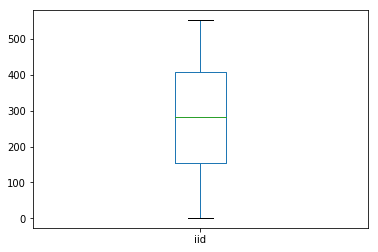

In [18]:
dating_data['iid'].plot(kind='box')
plt.show()

In [25]:
# Test if all are integer in iid (not needed based on results above)

for item in dating_data['iid']:
    if type(item) != int:
        print(item)
    

In [26]:
dating_data.index

RangeIndex(start=0, stop=8378, step=1)

In [29]:
dating_data.shape

(8378, 195)

In [38]:
dating_data['iid'].max()

552

In [39]:
dating_data['iid'].min()

1

**2) id**


In [36]:
dating_data['id']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       2.0
11       2.0
12       2.0
13       2.0
14       2.0
15       2.0
16       2.0
17       2.0
18       2.0
19       2.0
20       3.0
21       3.0
22       3.0
23       3.0
24       3.0
25       3.0
26       3.0
27       3.0
28       3.0
29       3.0
        ... 
8348    21.0
8349    21.0
8350    21.0
8351    21.0
8352    21.0
8353    21.0
8354    21.0
8355    21.0
8356    22.0
8357    22.0
8358    22.0
8359    22.0
8360    22.0
8361    22.0
8362    22.0
8363    22.0
8364    22.0
8365    22.0
8366    22.0
8367    22.0
8368    22.0
8369    22.0
8370    22.0
8371    22.0
8372    22.0
8373    22.0
8374    22.0
8375    22.0
8376    22.0
8377     NaN
Name: id, Length: 8378, dtype: float64

In [33]:
dating_data['id'].min()

1.0

In [34]:
dating_data['id'].max()

22.0

**3) gender**

In [35]:
dating_data['gender']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
8348    1
8349    1
8350    1
8351    1
8352    1
8353    1
8354    1
8355    1
8356    1
8357    1
8358    1
8359    1
8360    1
8361    1
8362    1
8363    1
8364    1
8365    1
8366    1
8367    1
8368    1
8369    1
8370    1
8371    1
8372    1
8373    1
8374    1
8375    1
8376    1
8377    1
Name: gender, Length: 8378, dtype: int64

**4) idg**

In [40]:
dating_data['idg']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       3
11       3
12       3
13       3
14       3
15       3
16       3
17       3
18       3
19       3
20       5
21       5
22       5
23       5
24       5
25       5
26       5
27       5
28       5
29       5
        ..
8348    42
8349    42
8350    42
8351    42
8352    42
8353    42
8354    42
8355    42
8356    44
8357    44
8358    44
8359    44
8360    44
8361    44
8362    44
8363    44
8364    44
8365    44
8366    44
8367    44
8368    44
8369    44
8370    44
8371    44
8372    44
8373    44
8374    44
8375    44
8376    44
8377    44
Name: idg, Length: 8378, dtype: int64

In [41]:
dating_data['idg'].min()

1

In [42]:
dating_data['idg'].max()

44

**condtn**

In [43]:
dating_data['condtn']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
8348    2
8349    2
8350    2
8351    2
8352    2
8353    2
8354    2
8355    2
8356    2
8357    2
8358    2
8359    2
8360    2
8361    2
8362    2
8363    2
8364    2
8365    2
8366    2
8367    2
8368    2
8369    2
8370    2
8371    2
8372    2
8373    2
8374    2
8375    2
8376    2
8377    2
Name: condtn, Length: 8378, dtype: int64

**wave**

In [45]:
dating_data['wave']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
8348    21
8349    21
8350    21
8351    21
8352    21
8353    21
8354    21
8355    21
8356    21
8357    21
8358    21
8359    21
8360    21
8361    21
8362    21
8363    21
8364    21
8365    21
8366    21
8367    21
8368    21
8369    21
8370    21
8371    21
8372    21
8373    21
8374    21
8375    21
8376    21
8377    21
Name: wave, Length: 8378, dtype: int64

**round**

In [46]:
dating_data['round']

0       10
1       10
2       10
3       10
4       10
5       10
6       10
7       10
8       10
9       10
10      10
11      10
12      10
13      10
14      10
15      10
16      10
17      10
18      10
19      10
20      10
21      10
22      10
23      10
24      10
25      10
26      10
27      10
28      10
29      10
        ..
8348    22
8349    22
8350    22
8351    22
8352    22
8353    22
8354    22
8355    22
8356    22
8357    22
8358    22
8359    22
8360    22
8361    22
8362    22
8363    22
8364    22
8365    22
8366    22
8367    22
8368    22
8369    22
8370    22
8371    22
8372    22
8373    22
8374    22
8375    22
8376    22
8377    22
Name: round, Length: 8378, dtype: int64

In [47]:
dating_data['round'].min()

5

In [48]:
dating_data['round'].max()

22

**position**

In [49]:
dating_data['position']

0        7
1        7
2        7
3        7
4        7
5        7
6        7
7        7
8        7
9        7
10       3
11       3
12       3
13       3
14       3
15       3
16       3
17       3
18       3
19       3
20       9
21       9
22       9
23       9
24       9
25       9
26       9
27       9
28       9
29       9
        ..
8348     5
8349    11
8350    17
8351    14
8352    13
8353    19
8354     3
8355     2
8356    21
8357    12
8358    15
8359     7
8360    22
8361    16
8362    10
8363    18
8364     1
8365     6
8366    20
8367     9
8368     8
8369     4
8370     5
8371    11
8372    17
8373    14
8374    13
8375    19
8376     3
8377     2
Name: position, Length: 8378, dtype: int64

In [50]:
print(dating_data['position'].min(),dating_data['position'].max())

1 22


**positin1**

In [51]:
dating_data['positin1']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
8348    21.0
8349    21.0
8350    21.0
8351    21.0
8352    21.0
8353    21.0
8354    21.0
8355    21.0
8356    10.0
8357    10.0
8358    10.0
8359    10.0
8360    10.0
8361    10.0
8362    10.0
8363    10.0
8364    10.0
8365    10.0
8366    10.0
8367    10.0
8368    10.0
8369    10.0
8370    10.0
8371    10.0
8372    10.0
8373    10.0
8374    10.0
8375    10.0
8376    10.0
8377    10.0
Name: positin1, Length: 8378, dtype: float64

In [52]:
print(dating_data['positin1'].min(),dating_data['positin1'].max())

1.0 22.0


**order**

In [53]:
dating_data['order']

0        4
1        3
2       10
3        5
4        7
5        6
6        1
7        2
8        8
9        9
10      10
11       9
12       6
13       1
14       3
15       2
16       7
17       8
18       4
19       5
20       6
21       5
22       2
23       7
24       9
25       8
26       3
27       4
28      10
29       1
        ..
8348     7
8349    13
8350    19
8351    16
8352    15
8353    21
8354     5
8355     4
8356    12
8357     3
8358     6
8359    20
8360    13
8361     7
8362     1
8363     9
8364    14
8365    19
8366    11
8367    22
8368    21
8369    17
8370    18
8371     2
8372     8
8373     5
8374     4
8375    10
8376    16
8377    15
Name: order, Length: 8378, dtype: int64

In [54]:
print(dating_data['order'].min(),dating_data['order'].max())

1 22


**partner**

In [55]:
dating_data['partner']

0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10       1
11       2
12       3
13       4
14       5
15       6
16       7
17       8
18       9
19      10
20       1
21       2
22       3
23       4
24       5
25       6
26       7
27       8
28       9
29      10
        ..
8348    15
8349    16
8350    17
8351    18
8352    19
8353    20
8354    21
8355    22
8356     1
8357     2
8358     3
8359     4
8360     5
8361     6
8362     7
8363     8
8364     9
8365    10
8366    11
8367    12
8368    13
8369    14
8370    15
8371    16
8372    17
8373    18
8374    19
8375    20
8376    21
8377    22
Name: partner, Length: 8378, dtype: int64

In [56]:
print(dating_data['partner'].min(),dating_data['partner'].max())

1 22


**pid**

In [57]:
dating_data['pid']

0        11.0
1        12.0
2        13.0
3        14.0
4        15.0
5        16.0
6        17.0
7        18.0
8        19.0
9        20.0
10       11.0
11       12.0
12       13.0
13       14.0
14       15.0
15       16.0
16       17.0
17       18.0
18       19.0
19       20.0
20       11.0
21       12.0
22       13.0
23       14.0
24       15.0
25       16.0
26       17.0
27       18.0
28       19.0
29       20.0
        ...  
8348    523.0
8349    524.0
8350    525.0
8351    526.0
8352    527.0
8353    528.0
8354    529.0
8355    530.0
8356    509.0
8357    510.0
8358    511.0
8359    512.0
8360    513.0
8361    514.0
8362    515.0
8363    516.0
8364    517.0
8365    518.0
8366    519.0
8367    520.0
8368    521.0
8369    522.0
8370    523.0
8371    524.0
8372    525.0
8373    526.0
8374    527.0
8375    528.0
8376    529.0
8377    530.0
Name: pid, Length: 8378, dtype: float64

In [58]:
print(dating_data['pid'].min(),dating_data['pid'].max())

1.0 552.0


**match**

In [59]:
dating_data['match']

0       0
1       0
2       1
3       1
4       1
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
8348    0
8349    0
8350    0
8351    0
8352    0
8353    0
8354    0
8355    0
8356    1
8357    1
8358    0
8359    0
8360    1
8361    0
8362    1
8363    1
8364    0
8365    0
8366    0
8367    0
8368    0
8369    0
8370    0
8371    1
8372    0
8373    0
8374    0
8375    0
8376    0
8377    0
Name: match, Length: 8378, dtype: int64

In [60]:
print(dating_data['match'].min(),dating_data['match'].max())

0 1


**int_corr**

In [62]:
dating_data['int_corr']

0       0.14
1       0.54
2       0.16
3       0.61
4       0.21
5       0.25
6       0.34
7       0.50
8       0.28
9      -0.36
10      0.29
11      0.18
12      0.10
13     -0.21
14      0.32
15      0.73
16      0.60
17      0.07
18      0.11
19      0.39
20     -0.24
21     -0.14
22      0.09
23     -0.04
24     -0.14
25     -0.30
26     -0.26
27      0.29
28     -0.15
29     -0.47
        ... 
8348    0.55
8349    0.46
8350    0.48
8351    0.41
8352    0.29
8353   -0.55
8354    0.09
8355   -0.32
8356    0.68
8357    0.63
8358    0.83
8359    0.73
8360    0.55
8361    0.54
8362    0.39
8363    0.59
8364    0.43
8365    0.47
8366    0.45
8367    0.37
8368    0.27
8369    0.45
8370    0.35
8371    0.59
8372    0.28
8373    0.64
8374    0.71
8375   -0.46
8376    0.62
8377    0.01
Name: int_corr, Length: 8378, dtype: float64

In [63]:
print(dating_data['int_corr'].min(),dating_data['int_corr'].max())

-0.83 0.91


**age**

In [64]:
dating_data['age']

0       21.0
1       21.0
2       21.0
3       21.0
4       21.0
5       21.0
6       21.0
7       21.0
8       21.0
9       21.0
10      24.0
11      24.0
12      24.0
13      24.0
14      24.0
15      24.0
16      24.0
17      24.0
18      24.0
19      24.0
20      25.0
21      25.0
22      25.0
23      25.0
24      25.0
25      25.0
26      25.0
27      25.0
28      25.0
29      25.0
        ... 
8348    27.0
8349    27.0
8350    27.0
8351    27.0
8352    27.0
8353    27.0
8354    27.0
8355    27.0
8356    25.0
8357    25.0
8358    25.0
8359    25.0
8360    25.0
8361    25.0
8362    25.0
8363    25.0
8364    25.0
8365    25.0
8366    25.0
8367    25.0
8368    25.0
8369    25.0
8370    25.0
8371    25.0
8372    25.0
8373    25.0
8374    25.0
8375    25.0
8376    25.0
8377    25.0
Name: age, Length: 8378, dtype: float64

In [65]:
print(dating_data['age'].min(),dating_data['age'].max())

18.0 55.0


**pf_o_att**

In [66]:
dating_data['pf_o_att']

0        35.00
1        60.00
2        19.00
3        30.00
4        30.00
5        50.00
6        35.00
7        33.33
8        50.00
9       100.00
10       35.00
11       60.00
12       19.00
13       30.00
14       30.00
15       50.00
16       35.00
17       33.33
18       50.00
19      100.00
20       35.00
21       60.00
22       19.00
23       30.00
24       30.00
25       50.00
26       35.00
27       33.33
28       50.00
29      100.00
         ...  
8348     10.00
8349     15.00
8350     10.00
8351     10.00
8352     50.00
8353     40.00
8354     10.00
8355     20.00
8356     10.00
8357     25.00
8358     20.00
8359     20.00
8360     20.00
8361     20.00
8362     20.00
8363     58.00
8364     15.00
8365     20.00
8366     40.00
8367     25.00
8368     10.00
8369     10.00
8370     10.00
8371     15.00
8372     10.00
8373     10.00
8374     50.00
8375     40.00
8376     10.00
8377     20.00
Name: pf_o_att, Length: 8378, dtype: float64

In [67]:
print(dating_data['pf_o_att'].min(),dating_data['pf_o_att'].max())

0.0 100.0


**dec_o**

In [68]:
dating_data['dec_o']

0       0
1       0
2       1
3       1
4       1
5       1
6       0
7       0
8       1
9       0
10      0
11      0
12      1
13      1
14      1
15      1
16      0
17      1
18      1
19      0
20      0
21      0
22      1
23      1
24      1
25      1
26      0
27      0
28      1
29      0
       ..
8348    1
8349    1
8350    1
8351    1
8352    0
8353    1
8354    1
8355    0
8356    1
8357    1
8358    1
8359    0
8360    1
8361    1
8362    1
8363    1
8364    0
8365    1
8366    0
8367    0
8368    1
8369    1
8370    1
8371    1
8372    0
8373    1
8374    0
8375    0
8376    1
8377    1
Name: dec_o, Length: 8378, dtype: int64

**attr_o**

In [69]:
dating_data['attr_o']

0        6.0
1        7.0
2       10.0
3        7.0
4        8.0
5        7.0
6        3.0
7        6.0
8        7.0
9        6.0
10       8.0
11       7.0
12      10.0
13       9.0
14      10.0
15       7.0
16       5.0
17       7.0
18       8.0
19       6.0
20       7.0
21       6.0
22      10.0
23       7.0
24       6.0
25       7.0
26       6.0
27       4.0
28       7.0
29       5.0
        ... 
8348     8.0
8349     6.0
8350     8.0
8351    10.0
8352     7.0
8353     6.0
8354     5.0
8355     6.0
8356     8.0
8357    10.0
8358     6.0
8359     NaN
8360     7.0
8361    10.0
8362     7.0
8363     7.0
8364     6.0
8365     8.0
8366     NaN
8367     6.0
8368     9.0
8369     8.0
8370     7.0
8371     8.0
8372     8.0
8373    10.0
8374     6.0
8375     2.0
8376     5.0
8377     8.0
Name: attr_o, Length: 8378, dtype: float64

In [70]:
print(dating_data['attr_o'].min(),dating_data['attr_o'].max())

0.0 10.5


In [74]:
dating_data['sinc_o']

0        8.0
1        8.0
2       10.0
3        8.0
4        7.0
5        7.0
6        6.0
7        7.0
8        7.0
9        6.0
10       7.0
11       6.0
12      10.0
13       9.0
14      10.0
15       8.0
16       3.0
17       7.0
18       6.0
19       5.0
20       8.0
21       7.0
22      10.0
23       9.0
24      10.0
25       6.0
26       3.0
27       5.0
28       7.0
29       6.0
        ... 
8348     5.0
8349     9.0
8350     8.0
8351     5.0
8352     7.0
8353     7.0
8354     7.0
8355     8.0
8356     4.0
8357     9.0
8358     3.0
8359     NaN
8360     6.0
8361     7.0
8362     7.0
8363     7.0
8364     5.0
8365     7.0
8366     NaN
8367     6.0
8368     7.0
8369     9.0
8370     2.0
8371     6.0
8372     8.0
8373     5.0
8374     3.0
8375     1.0
8376     7.0
8377     8.0
Name: sinc_o, Length: 8378, dtype: float64

In [77]:
print(dating_data['sinc_o'].min(),dating_data['sinc_o'].max())

0.0 10.0


In [76]:
dating_data['intel_o']

0        8.0
1       10.0
2       10.0
3        9.0
4        9.0
5        8.0
6        7.0
7        5.0
8        8.0
9        6.0
10       6.0
11      10.0
12      10.0
13       9.0
14      10.0
15       7.0
16       4.0
17       7.0
18       9.0
19       7.0
20       6.0
21      10.0
22      10.0
23       8.0
24       8.0
25       6.0
26       5.0
27       6.0
28       6.0
29       8.0
        ... 
8348     7.0
8349     8.0
8350     9.0
8351     8.0
8352     8.0
8353     7.0
8354     5.0
8355     7.0
8356     NaN
8357     9.0
8358     5.0
8359     NaN
8360     7.0
8361     5.0
8362     8.0
8363     7.0
8364     4.0
8365     6.0
8366     NaN
8367     6.0
8368     7.0
8369     9.0
8370     6.0
8371     7.0
8372     7.0
8373     3.0
8374     7.0
8375     2.0
8376     5.0
8377     7.0
Name: intel_o, Length: 8378, dtype: float64

In [78]:
print(dating_data['intel_o'].min(),dating_data['intel_o'].max())

0.0 10.0


In [79]:
dating_data['fun_o']

0        8.0
1        7.0
2       10.0
3        8.0
4        6.0
5        8.0
6        5.0
7        6.0
8        8.0
9        6.0
10       9.0
11       6.0
12      10.0
13       9.0
14      10.0
15       5.0
16       3.0
17       7.0
18       9.0
19       7.0
20       5.0
21       6.0
22      10.0
23       8.0
24       6.0
25       6.0
26       4.0
27       4.0
28       8.0
29       5.0
        ... 
8348    10.0
8349     6.0
8350     7.0
8351     6.0
8352     8.0
8353     6.0
8354     4.0
8355     6.0
8356     8.0
8357     8.0
8358     3.0
8359     NaN
8360     7.0
8361     5.0
8362     7.0
8363     8.0
8364     3.0
8365     7.0
8366     NaN
8367     6.0
8368     8.0
8369     7.0
8370     5.0
8371     7.0
8372     7.0
8373     2.0
8374     3.0
8375     2.0
8376     5.0
8377     7.0
Name: fun_o, Length: 8378, dtype: float64

In [81]:
print(dating_data['fun_o'].min(),dating_data['fun_o'].max())

0.0 11.0


In [86]:
dating_data['fun_o'] == 11.0
dating_data['fun_o'][dating_data['fun_o'] == 11.0] # one record higher than max rate

6608    11.0
Name: fun_o, dtype: float64

In [87]:
dating_data['amb_o']

0        8.0
1        7.0
2       10.0
3        9.0
4        9.0
5        7.0
6        8.0
7        8.0
8        8.0
9        6.0
10       7.0
11       6.0
12      10.0
13       9.0
14       7.0
15       7.0
16       5.0
17       7.0
18       8.0
19       9.0
20       8.0
21       6.0
22      10.0
23       8.0
24       NaN
25       6.0
26       5.0
27       6.0
28       7.0
29       8.0
        ... 
8348     7.0
8349     7.0
8350     8.0
8351     9.0
8352     8.0
8353     6.0
8354     4.0
8355     6.0
8356     8.0
8357     7.0
8358     3.0
8359     NaN
8360     6.0
8361     5.0
8362     7.0
8363     7.0
8364     6.0
8365     7.0
8366     NaN
8367     6.0
8368     8.0
8369     6.0
8370     8.0
8371     6.0
8372     8.0
8373     6.0
8374     7.0
8375     2.0
8376     3.0
8377     7.0
Name: amb_o, Length: 8378, dtype: float64

In [88]:
print(dating_data['amb_o'].min(),dating_data['amb_o'].max())

0.0 10.0


In [89]:
dating_data['shar_o']

0        6.0
1        5.0
2       10.0
3        8.0
4        7.0
5        7.0
6        7.0
7        6.0
8        9.0
9        6.0
10       4.0
11       5.0
12      10.0
13       9.0
14       8.0
15       7.0
16       3.0
17       5.0
18       7.0
19       7.0
20       4.0
21       5.0
22      10.0
23       8.0
24       NaN
25       6.0
26       4.0
27       4.0
28       7.0
29       6.0
        ... 
8348     8.0
8349     7.0
8350     7.0
8351     8.0
8352     4.0
8353     5.0
8354     4.0
8355     6.0
8356     2.0
8357     NaN
8358     3.0
8359     NaN
8360     6.0
8361     9.0
8362     7.0
8363     8.0
8364     5.0
8365     2.0
8366     NaN
8367     6.0
8368     6.0
8369     7.0
8370     3.0
8371     4.0
8372     6.0
8373     5.0
8374     2.0
8375     1.0
8376     6.0
8377     7.0
Name: shar_o, Length: 8378, dtype: float64

In [90]:
print(dating_data['shar_o'].min(),dating_data['shar_o'].max())

0.0 10.0


In [91]:
dating_data['like_o']

0        7.0
1        8.0
2       10.0
3        7.0
4        8.0
5        7.0
6        2.0
7        7.0
8        6.5
9        6.0
10       7.0
11       8.0
12      10.0
13       9.0
14      10.0
15       7.0
16       4.0
17       7.0
18       8.0
19       6.0
20       5.0
21       7.0
22      10.0
23       7.0
24       6.0
25       6.0
26       2.0
27       5.0
28       7.0
29       5.0
        ... 
8348     8.0
8349     6.0
8350     7.0
8351     8.0
8352     8.0
8353     6.0
8354     5.0
8355     5.0
8356     6.0
8357     9.0
8358     4.0
8359     NaN
8360     7.0
8361     7.0
8362     7.0
8363     7.0
8364     3.0
8365     6.0
8366     NaN
8367     5.0
8368     7.0
8369     7.0
8370     7.0
8371     5.0
8372     7.0
8373     6.0
8374     2.0
8375     2.0
8376     6.0
8377     8.0
Name: like_o, Length: 8378, dtype: float64

In [92]:
print(dating_data['like_o'].min(),dating_data['like_o'].max())

0.0 10.0


In [93]:
dating_data['prob_o']

0        4.0
1        4.0
2       10.0
3        7.0
4        6.0
5        6.0
6        1.0
7        5.0
8        8.0
9        6.0
10       2.0
11       4.0
12      10.0
13       7.0
14       1.0
15       5.0
16       3.0
17       6.0
18       8.0
19       9.0
20       2.0
21       3.0
22      10.0
23       7.0
24       1.0
25       7.0
26       2.0
27       1.0
28       7.0
29       5.0
        ... 
8348     4.0
8349     4.0
8350     6.0
8351     1.0
8352     3.0
8353     6.0
8354     5.0
8355     4.0
8356     1.0
8357     8.0
8358     4.0
8359     NaN
8360     5.0
8361     4.0
8362     5.0
8363     6.0
8364     6.0
8365     4.0
8366     NaN
8367     2.0
8368     5.0
8369     4.5
8370     2.0
8371     2.0
8372     4.0
8373     1.0
8374     2.0
8375     1.0
8376     4.0
8377     5.0
Name: prob_o, Length: 8378, dtype: float64

In [94]:
print(dating_data['prob_o'].min(),dating_data['prob_o'].max())

0.0 10.0


In [95]:
dating_data['met_o']

0       2.0
1       2.0
2       1.0
3       2.0
4       2.0
5       2.0
6       2.0
7       2.0
8       2.0
9       2.0
10      2.0
11      2.0
12      2.0
13      2.0
14      1.0
15      2.0
16      2.0
17      2.0
18      2.0
19      2.0
20      1.0
21      2.0
22      2.0
23      2.0
24      2.0
25      2.0
26      2.0
27      2.0
28      2.0
29      2.0
       ... 
8348    2.0
8349    2.0
8350    2.0
8351    1.0
8352    1.0
8353    1.0
8354    2.0
8355    2.0
8356    2.0
8357    2.0
8358    2.0
8359    NaN
8360    2.0
8361    2.0
8362    2.0
8363    2.0
8364    2.0
8365    2.0
8366    NaN
8367    2.0
8368    2.0
8369    2.0
8370    2.0
8371    2.0
8372    2.0
8373    NaN
8374    2.0
8375    2.0
8376    2.0
8377    2.0
Name: met_o, Length: 8378, dtype: float64

In [97]:
print(dating_data['met_o'].min(),dating_data['met_o'].max())

1.0 8.0


In [99]:
dating_data['met_o'][dating_data['met_o'] > 2.0] # one record higher than max rate

989     3.0
1515    5.0
2546    6.0
2569    7.0
2579    8.0
3380    7.0
6566    7.0
8053    5.0
Name: met_o, dtype: float64

In [100]:
dating_data['field']

0                    Law
1                    Law
2                    Law
3                    Law
4                    Law
5                    Law
6                    Law
7                    Law
8                    Law
9                    Law
10                   law
11                   law
12                   law
13                   law
14                   law
15                   law
16                   law
17                   law
18                   law
19                   law
20             Economics
21             Economics
22             Economics
23             Economics
24             Economics
25             Economics
26             Economics
27             Economics
28             Economics
29             Economics
              ...       
8348            Business
8349            Business
8350            Business
8351            Business
8352            Business
8353            Business
8354            Business
8355            Business
8356    Climate Dynamics


In [101]:
dating_data['exphappy']

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
5        3.0
6        3.0
7        3.0
8        3.0
9        3.0
10       4.0
11       4.0
12       4.0
13       4.0
14       4.0
15       4.0
16       4.0
17       4.0
18       4.0
19       4.0
20       4.0
21       4.0
22       4.0
23       4.0
24       4.0
25       4.0
26       4.0
27       4.0
28       4.0
29       4.0
        ... 
8348     3.0
8349     3.0
8350     3.0
8351     3.0
8352     3.0
8353     3.0
8354     3.0
8355     3.0
8356    10.0
8357    10.0
8358    10.0
8359    10.0
8360    10.0
8361    10.0
8362    10.0
8363    10.0
8364    10.0
8365    10.0
8366    10.0
8367    10.0
8368    10.0
8369    10.0
8370    10.0
8371    10.0
8372    10.0
8373    10.0
8374    10.0
8375    10.0
8376    10.0
8377    10.0
Name: exphappy, Length: 8378, dtype: float64

In [102]:
print(dating_data['exphappy'].min(),dating_data['exphappy'].max())

1.0 10.0


In [103]:
dating_data['pf_o_att']

0        35.00
1        60.00
2        19.00
3        30.00
4        30.00
5        50.00
6        35.00
7        33.33
8        50.00
9       100.00
10       35.00
11       60.00
12       19.00
13       30.00
14       30.00
15       50.00
16       35.00
17       33.33
18       50.00
19      100.00
20       35.00
21       60.00
22       19.00
23       30.00
24       30.00
25       50.00
26       35.00
27       33.33
28       50.00
29      100.00
         ...  
8348     10.00
8349     15.00
8350     10.00
8351     10.00
8352     50.00
8353     40.00
8354     10.00
8355     20.00
8356     10.00
8357     25.00
8358     20.00
8359     20.00
8360     20.00
8361     20.00
8362     20.00
8363     58.00
8364     15.00
8365     20.00
8366     40.00
8367     25.00
8368     10.00
8369     10.00
8370     10.00
8371     15.00
8372     10.00
8373     10.00
8374     50.00
8375     40.00
8376     10.00
8377     20.00
Name: pf_o_att, Length: 8378, dtype: float64

In [105]:
print(dating_data['pf_o_att'].min(),dating_data['pf_o_att'].max())

0.0 100.0


In [106]:
dating_data['pf_o_sin']

0       20.00
1        0.00
2       18.00
3        5.00
4       10.00
5        0.00
6       15.00
7       11.11
8        0.00
9        0.00
10      20.00
11       0.00
12      18.00
13       5.00
14      10.00
15       0.00
16      15.00
17      11.11
18       0.00
19       0.00
20      20.00
21       0.00
22      18.00
23       5.00
24      10.00
25       0.00
26      15.00
27      11.11
28       0.00
29       0.00
        ...  
8348    25.00
8349    20.00
8350    15.00
8351    10.00
8352    20.00
8353    10.00
8354    25.00
8355    20.00
8356    20.00
8357    25.00
8358    10.00
8359    20.00
8360    20.00
8361    20.00
8362    20.00
8363     5.00
8364    20.00
8365    25.00
8366     5.00
8367    15.00
8368    30.00
8369    20.00
8370    25.00
8371    20.00
8372    15.00
8373    10.00
8374    20.00
8375    10.00
8376    25.00
8377    20.00
Name: pf_o_sin, Length: 8378, dtype: float64

In [107]:
print(dating_data['pf_o_sin'].min(),dating_data['pf_o_sin'].max())

0.0 60.0


In [108]:
dating_data['pf_o_int']

0       20.00
1        0.00
2       19.00
3       15.00
4       20.00
5       30.00
6       25.00
7       11.11
8       25.00
9        0.00
10      20.00
11       0.00
12      19.00
13      15.00
14      20.00
15      30.00
16      25.00
17      11.11
18      25.00
19       0.00
20      20.00
21       0.00
22      19.00
23      15.00
24      20.00
25      30.00
26      25.00
27      11.11
28      25.00
29       0.00
        ...  
8348    20.00
8349    25.00
8350    30.00
8351    30.00
8352    10.00
8353    30.00
8354    25.00
8355    10.00
8356    30.00
8357    25.00
8358    10.00
8359    20.00
8360    20.00
8361    20.00
8362    20.00
8363     8.00
8364    20.00
8365    25.00
8366    30.00
8367    25.00
8368    20.00
8369    15.00
8370    20.00
8371    25.00
8372    30.00
8373    30.00
8374    10.00
8375    30.00
8376    25.00
8377    10.00
Name: pf_o_int, Length: 8378, dtype: float64

In [109]:
print(dating_data['pf_o_int'].min(),dating_data['pf_o_int'].max())

0.0 50.0


In [111]:
print(dating_data['pf_o_int'])
print(dating_data['pf_o_int'].min(),dating_data['pf_o_int'].max())

0       20.00
1        0.00
2       19.00
3       15.00
4       20.00
5       30.00
6       25.00
7       11.11
8       25.00
9        0.00
10      20.00
11       0.00
12      19.00
13      15.00
14      20.00
15      30.00
16      25.00
17      11.11
18      25.00
19       0.00
20      20.00
21       0.00
22      19.00
23      15.00
24      20.00
25      30.00
26      25.00
27      11.11
28      25.00
29       0.00
        ...  
8348    20.00
8349    25.00
8350    30.00
8351    30.00
8352    10.00
8353    30.00
8354    25.00
8355    10.00
8356    30.00
8357    25.00
8358    10.00
8359    20.00
8360    20.00
8361    20.00
8362    20.00
8363     8.00
8364    20.00
8365    25.00
8366    30.00
8367    25.00
8368    20.00
8369    15.00
8370    20.00
8371    25.00
8372    30.00
8373    30.00
8374    10.00
8375    30.00
8376    25.00
8377    10.00
Name: pf_o_int, Length: 8378, dtype: float64
0.0 50.0


In [112]:
print(dating_data['pf_o_fun'])
print(dating_data['pf_o_fun'].min(),dating_data['pf_o_fun'].max())

0       20.00
1       40.00
2       18.00
3       40.00
4       10.00
5       10.00
6       10.00
7       11.11
8       10.00
9        0.00
10      20.00
11      40.00
12      18.00
13      40.00
14      10.00
15      10.00
16      10.00
17      11.11
18      10.00
19       0.00
20      20.00
21      40.00
22      18.00
23      40.00
24      10.00
25      10.00
26      10.00
27      11.11
28      10.00
29       0.00
        ...  
8348    20.00
8349    20.00
8350    20.00
8351    20.00
8352     5.00
8353    10.00
8354    10.00
8355    15.00
8356    10.00
8357    12.00
8358    30.00
8359    20.00
8360    20.00
8361    15.00
8362    15.00
8363    10.00
8364    20.00
8365    30.00
8366    15.00
8367    15.00
8368    15.00
8369    20.00
8370    20.00
8371    20.00
8372    20.00
8373    20.00
8374     5.00
8375    10.00
8376    10.00
8377    15.00
Name: pf_o_fun, Length: 8378, dtype: float64
0.0 50.0


In [113]:
print(dating_data['pf_o_amb'])
print(dating_data['pf_o_amb'].min(),dating_data['pf_o_amb'].max())

0        0.00
1        0.00
2       14.00
3        5.00
4       10.00
5        0.00
6        5.00
7       11.11
8        0.00
9        0.00
10       0.00
11       0.00
12      14.00
13       5.00
14      10.00
15       0.00
16       5.00
17      11.11
18       0.00
19       0.00
20       0.00
21       0.00
22      14.00
23       5.00
24      10.00
25       0.00
26       5.00
27      11.11
28       0.00
29       0.00
        ...  
8348     5.00
8349    10.00
8350    15.00
8351    10.00
8352    10.00
8353    10.00
8354    10.00
8355     5.00
8356    10.00
8357     3.00
8358    15.00
8359     5.00
8360     5.00
8361     5.00
8362    10.00
8363     7.00
8364     5.00
8365     5.00
8366     5.00
8367    10.00
8368    15.00
8369    15.00
8370     5.00
8371    10.00
8372    15.00
8373    10.00
8374    10.00
8375    10.00
8376    10.00
8377     5.00
Name: pf_o_amb, Length: 8378, dtype: float64
0.0 53.0


In [114]:
print(dating_data['pf_o_sha'])
print(dating_data['pf_o_sha'].min(),dating_data['pf_o_sha'].max())

0        5.00
1        0.00
2       12.00
3        5.00
4       20.00
5       10.00
6       10.00
7       22.22
8       15.00
9        0.00
10       5.00
11       0.00
12      12.00
13       5.00
14      20.00
15      10.00
16      10.00
17      22.22
18      15.00
19       0.00
20       5.00
21       0.00
22      12.00
23       5.00
24      20.00
25      10.00
26      10.00
27      22.22
28      15.00
29       0.00
        ...  
8348    20.00
8349    10.00
8350    10.00
8351    15.00
8352     5.00
8353      NaN
8354    20.00
8355    30.00
8356    20.00
8357    10.00
8358    15.00
8359    15.00
8360    15.00
8361    20.00
8362    15.00
8363    12.00
8364    10.00
8365     5.00
8366     5.00
8367    10.00
8368    10.00
8369    20.00
8370    20.00
8371    10.00
8372    10.00
8373    15.00
8374     5.00
8375      NaN
8376    20.00
8377    30.00
Name: pf_o_sha, Length: 8378, dtype: float64
0.0 30.0


In [116]:
print(dating_data['age'])
print(dating_data['age'].min(),dating_data['age'].max())

0       21.0
1       21.0
2       21.0
3       21.0
4       21.0
5       21.0
6       21.0
7       21.0
8       21.0
9       21.0
10      24.0
11      24.0
12      24.0
13      24.0
14      24.0
15      24.0
16      24.0
17      24.0
18      24.0
19      24.0
20      25.0
21      25.0
22      25.0
23      25.0
24      25.0
25      25.0
26      25.0
27      25.0
28      25.0
29      25.0
        ... 
8348    27.0
8349    27.0
8350    27.0
8351    27.0
8352    27.0
8353    27.0
8354    27.0
8355    27.0
8356    25.0
8357    25.0
8358    25.0
8359    25.0
8360    25.0
8361    25.0
8362    25.0
8363    25.0
8364    25.0
8365    25.0
8366    25.0
8367    25.0
8368    25.0
8369    25.0
8370    25.0
8371    25.0
8372    25.0
8373    25.0
8374    25.0
8375    25.0
8376    25.0
8377    25.0
Name: age, Length: 8378, dtype: float64
18.0 55.0


In [119]:
print(dating_data['field'])

0                    Law
1                    Law
2                    Law
3                    Law
4                    Law
5                    Law
6                    Law
7                    Law
8                    Law
9                    Law
10                   law
11                   law
12                   law
13                   law
14                   law
15                   law
16                   law
17                   law
18                   law
19                   law
20             Economics
21             Economics
22             Economics
23             Economics
24             Economics
25             Economics
26             Economics
27             Economics
28             Economics
29             Economics
              ...       
8348            Business
8349            Business
8350            Business
8351            Business
8352            Business
8353            Business
8354            Business
8355            Business
8356    Climate Dynamics


In [120]:
print(dating_data['field_cd'])
print(dating_data['field_cd'].min(),dating_data['field_cd'].max())

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       2.0
21       2.0
22       2.0
23       2.0
24       2.0
25       2.0
26       2.0
27       2.0
28       2.0
29       2.0
        ... 
8348     8.0
8349     8.0
8350     8.0
8351     8.0
8352     8.0
8353     8.0
8354     8.0
8355     8.0
8356    18.0
8357    18.0
8358    18.0
8359    18.0
8360    18.0
8361    18.0
8362    18.0
8363    18.0
8364    18.0
8365    18.0
8366    18.0
8367    18.0
8368    18.0
8369    18.0
8370    18.0
8371    18.0
8372    18.0
8373    18.0
8374    18.0
8375    18.0
8376    18.0
8377    18.0
Name: field_cd, Length: 8378, dtype: float64
1.0 18.0


In [123]:
dating_data['field_cd'].describe()

count    8296.000000
mean        7.662488
std         3.758935
min         1.000000
25%         5.000000
50%         8.000000
75%        10.000000
max        18.000000
Name: field_cd, dtype: float64

In [125]:
dating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [129]:
dating_data['field_cd'] = dating_data['field_cd'].astype('category')

In [130]:
dating_data['field_cd'].describe()

count     8296.0
unique      18.0
top          8.0
freq      1925.0
Name: field_cd, dtype: float64

In [138]:
dating_data['field_cd'][pd.isnull(dating_data['field_cd'])]


504    NaN
505    NaN
506    NaN
507    NaN
508    NaN
509    NaN
510    NaN
511    NaN
512    NaN
513    NaN
514    NaN
515    NaN
516    NaN
517    NaN
518    NaN
519    NaN
520    NaN
521    NaN
522    NaN
828    NaN
829    NaN
830    NaN
831    NaN
832    NaN
833    NaN
834    NaN
835    NaN
836    NaN
837    NaN
838    NaN
        ..
5012   NaN
5013   NaN
5014   NaN
5015   NaN
5016   NaN
5017   NaN
5018   NaN
5019   NaN
5020   NaN
5021   NaN
5022   NaN
5023   NaN
5114   NaN
5115   NaN
5116   NaN
5117   NaN
5118   NaN
5119   NaN
5120   NaN
5121   NaN
5122   NaN
5123   NaN
5124   NaN
5125   NaN
5126   NaN
5127   NaN
5128   NaN
5129   NaN
5130   NaN
5131   NaN
Name: field_cd, Length: 82, dtype: category
Categories (18, float64): [1.0, 2.0, 3.0, 4.0, ..., 15.0, 16.0, 17.0, 18.0]

In [131]:
dating_data['position'] = dating_data['position'].astype('category')

In [132]:
dating_data['position'].describe()

count     8378
unique      22
top          2
freq       554
Name: position, dtype: int64

In [198]:
dating_data['position'][pd.isnull(dating_data['position'])]

Series([], Name: position, dtype: int64)